# Speed Dating Data
https://www.kaggle.com/annavictoria/speed-dating-experiment

# 2 Exploratory Data Analysis

## 2.1  Imports

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from pandas_profiling import ProfileReport
from scipy import stats

from sb_utils import save_file

In [2]:
# not sure if I need this
import datetime
import unicodedata
import re
from sklearn.preprocessing import scale

## 2.2 Objectives

In the data wrangling notebook, we have identified our target dependent variable as desicion of parner of the specific subject, dec_o (might also consider match, desicion from both the subject and the partner) and cleaned the data accordingly. In this notebook, we will conduct further EDA, hoping to answer following questions.

1. The difference of desirable attributes in a male partner vs female partner.
2. The difference of desirable attributes among  races.
3. The difference of desirable major of male partner vs female partner
4. The difference of desirable majors among races.  


Here is the possible workflow: TBD
- Linear regressions & Random forest regressions etc comparison:
    - Two linear regressions model 1) one without PCA, 2) one with PCA
    - Use all the attributes with 1-10 scoring (attr_o) system including gender and race as.independent variables. Then perform PCA to check necessary attributes.


## 2.3 Load The Data

In [3]:
# df = pd.read_csv('../data/ski_data_cleaned.csv')
spd = pd.read_csv('spd_data_wrangling_output/Speed_Dating_data_cleaned.csv') #spd1_2 in data wrangling notebook
spd_fp = pd.read_csv('spd_data_wrangling_output/Speed_Dating_data_FemaleRatingMale_cleaned.csv') # spd1_2fp in data wrangling notebook 
spd_mp = pd.read_csv('spd_data_wrangling_output/Speed_Dating_data_MaleRatingFemale_cleaned.csv') # spd1_2mp in data wrangling notebook

In [4]:
spd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6266 entries, 0 to 6265
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    6266 non-null   int64  
 1   match     6266 non-null   int64  
 2   age       6198 non-null   float64
 3   race      6208 non-null   float64
 4   field     6208 non-null   object 
 5   career    6182 non-null   object 
 6   from      6192 non-null   object 
 7   goal      6192 non-null   float64
 8   int_corr  6118 non-null   float64
 9   samerace  6266 non-null   int64  
 10  imprace   6192 non-null   float64
 11  imprelig  6192 non-null   float64
 12  age_o     6189 non-null   float64
 13  race_o    6198 non-null   float64
 14  dec_o     6266 non-null   int64  
 15  attr_o    6127 non-null   float64
 16  sinc_o    6064 non-null   float64
 17  intel_o   6054 non-null   float64
 18  fun_o     5999 non-null   float64
 19  amb_o     5709 non-null   float64
 20  shar_o    5399 non-null   floa

In [5]:
spd.head()

,gender,match,age,race,field,career,from,goal,int_corr,samerace,...,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,0,0,21.0,4.0,Law,lawyer,Chicago,2.0,0.14,0,...,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,0,0,21.0,4.0,Law,lawyer,Chicago,2.0,0.54,0,...,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.16,1,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.61,0,...,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.21,0,...,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0


In [6]:
spd_fp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3138 entries, 0 to 3137
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    3138 non-null   int64  
 1   match     3138 non-null   int64  
 2   age       3108 non-null   float64
 3   race      3118 non-null   float64
 4   field     3118 non-null   object 
 5   career    3118 non-null   object 
 6   from      3118 non-null   object 
 7   goal      3118 non-null   float64
 8   int_corr  3064 non-null   float64
 9   samerace  3138 non-null   int64  
 10  imprace   3118 non-null   float64
 11  imprelig  3118 non-null   float64
 12  age_o     3090 non-null   float64
 13  race_o    3090 non-null   float64
 14  dec_o     3138 non-null   int64  
 15  attr_o    3065 non-null   float64
 16  sinc_o    3039 non-null   float64
 17  intel_o   3033 non-null   float64
 18  fun_o     2995 non-null   float64
 19  amb_o     2852 non-null   float64
 20  shar_o    2671 non-null   floa

In [7]:
spd_fp.head()

,gender,match,age,race,field,career,from,goal,int_corr,samerace,...,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,1,0,27.0,2.0,Finance,"Academia, Research, Banking, Life",Argentina,1.0,0.14,0,...,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0,2.0
1,1,0,27.0,2.0,Finance,"Academia, Research, Banking, Life",Argentina,1.0,0.29,1,...,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0,2.0
2,1,0,27.0,2.0,Finance,"Academia, Research, Banking, Life",Argentina,1.0,-0.24,1,...,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0,1.0
3,1,0,27.0,2.0,Finance,"Academia, Research, Banking, Life",Argentina,1.0,-0.18,1,...,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0,2.0
4,1,0,27.0,2.0,Finance,"Academia, Research, Banking, Life",Argentina,1.0,-0.43,1,...,0,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0,2.0


In [8]:
spd_mp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3128 entries, 0 to 3127
Data columns (total 24 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   gender    3128 non-null   int64  
 1   match     3128 non-null   int64  
 2   age       3090 non-null   float64
 3   race      3090 non-null   float64
 4   field     3090 non-null   object 
 5   career    3064 non-null   object 
 6   from      3074 non-null   object 
 7   goal      3074 non-null   float64
 8   int_corr  3054 non-null   float64
 9   samerace  3128 non-null   int64  
 10  imprace   3074 non-null   float64
 11  imprelig  3074 non-null   float64
 12  age_o     3099 non-null   float64
 13  race_o    3108 non-null   float64
 14  dec_o     3128 non-null   int64  
 15  attr_o    3062 non-null   float64
 16  sinc_o    3025 non-null   float64
 17  intel_o   3021 non-null   float64
 18  fun_o     3004 non-null   float64
 19  amb_o     2857 non-null   float64
 20  shar_o    2728 non-null   floa

In [9]:
spd_mp.head()

,gender,match,age,race,field,career,from,goal,int_corr,samerace,...,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o,met_o
0,0,0,21.0,4.0,Law,lawyer,Chicago,2.0,0.14,0,...,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0,2.0
1,0,0,21.0,4.0,Law,lawyer,Chicago,2.0,0.54,0,...,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0,2.0
2,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.16,1,...,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0,1.0
3,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.61,0,...,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0,2.0
4,0,1,21.0,4.0,Law,lawyer,Chicago,2.0,0.21,0,...,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0,2.0


## 2.4 Explore The Data

### 2.4.1 Visualizing correlations

refer to pandas profiling data created in data wrangling notebook
- pd1_2_report.html
- spd1_2fp_report.html
- spd1_2mp_report.html

#### 2.4.1.1 Manual exploration

In [10]:
# refer to 'https://stackoverflow.com/questions/26462893/import-html-to-ipython-notebook-file'
# from IPython.display import HTML
# HTML(filename='spd_data_wrangling_output/spd1_2fp_report.html')
#%%%%%% how to diplay html file!??

<AxesSubplot:>

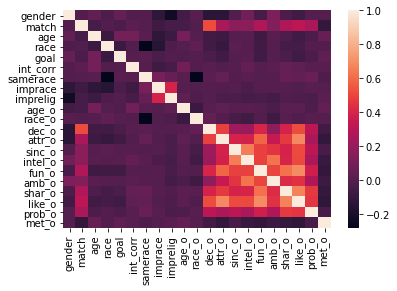

In [11]:
# Make a heatmap of the data 
# refer to 'https://seaborn.pydata.org/generated/seaborn.heatmap.html'
# refer to 'https://stackoverflow.com/questions/50754471/seaborn-heatmap-not-displaying-all-xticks-and-yticks'
sns.heatmap(spd.corr(), xticklabels=True, yticklabels=True)

<AxesSubplot:>

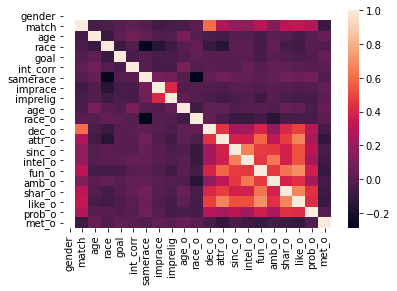

In [12]:
# female parner rating on male subject
sns.heatmap(spd_fp.corr(), xticklabels=True, yticklabels=True)

<AxesSubplot:>

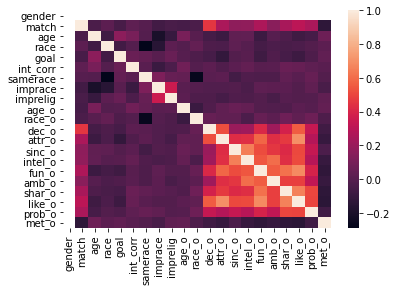

In [13]:
# male partner rating on female subject
sns.heatmap(spd_mp.corr(), xticklabels=True, yticklabels=True)

<AxesSubplot:xlabel='attr_o', ylabel='dec_o'>

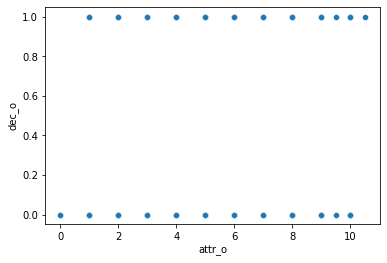

In [14]:
# Plot attr_o against dec_o
# refer to 'https://seaborn.pydata.org/generated/seaborn.scatterplot.html?highlight=scatterplot#seaborn.scatterplot'
sns.scatterplot(x='attr_o', y='dec_o', data=spd_fp)

<AxesSubplot:xlabel='attr_o', ylabel='dec_o'>

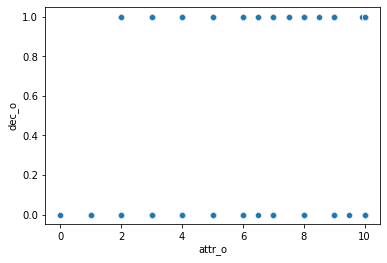

In [15]:
sns.scatterplot(x='attr_o', y='dec_o', data=spd_mp)

scatter plot does not seem to help. Also since the subject information have low correlation with partner's decision, we will only exract partner's information.
- four df:
    - spd_fp: dec_o = 1 or 0, columns = dec_o to prob_o
    - spd_mp: dec_o = 1 or 0, columns = dec_o to prob_o

In [16]:
# extracting 'spd_fp: columns = dec_o to prob_o'
spd_fp_mini = spd_fp.loc[:, 'dec_o':'prob_o']
spd_fp_mini

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
1,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0
2,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0
3,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0
4,0,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...
3133,0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3134,0,7.0,10.0,8.0,8.0,8.0,7.0,7.0,10.0
3135,0,6.0,8.0,10.0,6.0,9.0,5.0,5.0,4.0
3136,0,3.0,9.0,10.0,3.0,10.0,2.0,3.0,3.0


In [17]:
# extracting dec_o = 1 (Yes) from spd_fp_mini
spd_fp_miniY = spd_fp_mini[spd_fp_mini.dec_o == 1]
spd_fp_miniY

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
5,1,6.0,9.0,7.0,6.0,7.0,6.0,6.0,6.0
7,1,5.0,8.0,7.0,4.0,7.0,5.0,4.0,5.0
8,1,8.0,10.0,9.0,8.0,7.0,6.0,5.0,5.0
10,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...
3100,1,5.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0
3103,1,7.0,9.0,10.0,9.0,9.0,6.0,7.0,7.0
3106,1,4.0,6.0,8.0,7.0,9.0,2.0,4.0,5.0
3120,1,5.0,8.0,10.0,10.0,10.0,5.0,10.0,9.0


In [18]:
# extracting dec_o = 0 (No) from spd_fp_mini
spd_fp_miniN = spd_fp_mini[spd_fp_mini.dec_o == 0]
spd_fp_miniN

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
1,0,5.0,7.0,8.0,4.0,6.0,3.0,6.0,4.0
2,0,7.0,9.0,10.0,7.0,8.0,9.0,8.0,7.0
3,0,4.0,10.0,8.0,5.0,8.0,7.0,6.0,7.0
4,0,5.0,8.0,8.0,2.0,2.0,2.0,7.0,5.0
6,0,4.0,8.0,8.0,5.0,7.0,4.0,7.0,4.0
...,...,...,...,...,...,...,...,...,...
3133,0,2.0,NaN,NaN,NaN,NaN,NaN,3.0,1.0
3134,0,7.0,10.0,8.0,8.0,8.0,7.0,7.0,10.0
3135,0,6.0,8.0,10.0,6.0,9.0,5.0,5.0,4.0
3136,0,3.0,9.0,10.0,3.0,10.0,2.0,3.0,3.0


In [19]:
# extracting 'spd_mp: columns = dec_o to prob_o'
spd_mp_mini = spd_mp.loc[:, 'dec_o':'prob_o']
spd_mp_mini

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0
1,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0
2,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0
4,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0
...,...,...,...,...,...,...,...,...,...
3123,1,7.0,9.0,7.0,7.0,5.0,6.0,7.0,8.0
3124,1,8.0,7.0,7.0,7.0,5.0,5.0,7.0,6.0
3125,1,6.0,5.0,5.0,6.0,5.0,3.0,6.0,4.0
3126,1,8.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0


In [20]:
# extracting dec_o = 1 (Yes) from spd_mp_mini
spd_mp_miniY = spd_mp_mini[spd_mp_mini.dec_o == 1]
spd_mp_miniY

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
2,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0
4,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0
5,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0
8,1,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0
...,...,...,...,...,...,...,...,...,...
3123,1,7.0,9.0,7.0,7.0,5.0,6.0,7.0,8.0
3124,1,8.0,7.0,7.0,7.0,5.0,5.0,7.0,6.0
3125,1,6.0,5.0,5.0,6.0,5.0,3.0,6.0,4.0
3126,1,8.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0


In [21]:
# extracting dec_o = 0 (No) from spd_mp_mini
spd_mp_miniN = spd_mp_mini[spd_mp_mini.dec_o == 0]
spd_mp_miniN

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0
1,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0
6,0,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0
7,0,6.0,7.0,5.0,6.0,8.0,6.0,7.0,5.0
9,0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...
3114,0,8.0,5.0,8.0,5.0,7.0,5.0,7.0,3.0
3115,0,9.0,7.0,9.0,6.0,7.0,5.0,8.0,4.0
3117,0,8.0,6.0,8.0,3.0,3.0,2.0,5.0,4.0
3118,0,6.0,6.0,7.0,9.0,7.0,4.0,7.0,5.0


#### 2.4.1.2 Pandas_profiling overview: getting distribution of data (histogram)

In [22]:
profile_fp_miniY = ProfileReport(spd_fp_miniY, title="Pandas Profiling Report: FemaleRatingMaleYes, minimal", minimal=True)
profile_fp_miniY

In [23]:
# save the profile_fp_miniY as html
profile_fp_miniY.to_file("spd_fp_miniY_report.html")

In [24]:
profile_fp_miniN = ProfileReport(spd_fp_miniN, title="Pandas Profiling Report: FemaleRatingMaleNo, minimal", minimal=True)
profile_fp_miniN

In [25]:
# save the profile_fp_miniN as html
profile_fp_miniN.to_file("spd_fp_miniN_report.html")

In [26]:
profile_mp_miniY = ProfileReport(spd_mp_miniY, title="Pandas Profiling Report: MaleRatingFemaleYes, minimal", minimal=True)
profile_mp_miniY

In [27]:
# save the profile_mp_miniY as html
profile_mp_miniY.to_file("spd_mp_miniY_report.html")

In [28]:
profile_mp_miniN = ProfileReport(spd_mp_miniN, title="Pandas Profiling Report: MaleRatingFemaleNo, minimal", minimal=True)
profile_mp_miniN

In [29]:
# save the profile_mp_miniY as html
profile_mp_miniN.to_file("spd_mp_miniN_report.html")

Since not all the data for all the attributes are normally distributed, we should conduct permutation test!?
- refer to 'Data Science prep course/The Apps Project/Tier 3: PART 3, Tier 3 - Modelling.ipynb'

### 2.4.2 Calculate the PCA transformation
refor to '6_GuidedCapstone/03_exploratory_data_analysis_mk'

In [30]:
# %%%%%% should we fit the PCA for the spd or spd_fp/spd_mp or spd_fp_miniY/spd_fp_miniN/spd_mp_miniY/spd_mp_miniN?
# I will do it all for now...
'''
spd_fp_miniY_pca = PCA().fit(spd_fp_miniY) # this code gives error below
ValueError: Input contains NaN, infinity or a value too large for dtype('float64').
Need to deal with missing data in each df before applying pca transfromation!?
'''

"\nspd_fp_miniY_pca = PCA().fit(spd_fp_miniY) # this code gives error below\nValueError: Input contains NaN, infinity or a value too large for dtype('float64').\nNeed to deal with missing data in each df before applying pca transfromation!?\n"

#### 2.4.2.1 filling NaN with mean

In [31]:
# make new df
spd_fp_miniY_mean = spd_fp_miniY.fillna(spd_fp_miniY.mean())
spd_fp_miniY_mean

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,1,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
5,1,6.0,9.0,7.0,6.0,7.0,6.0,6.0,6.0
7,1,5.0,8.0,7.0,4.0,7.0,5.0,4.0,5.0
8,1,8.0,10.0,9.0,8.0,7.0,6.0,5.0,5.0
10,1,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
...,...,...,...,...,...,...,...,...,...
3100,1,5.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0
3103,1,7.0,9.0,10.0,9.0,9.0,6.0,7.0,7.0
3106,1,4.0,6.0,8.0,7.0,9.0,2.0,4.0,5.0
3120,1,5.0,8.0,10.0,10.0,10.0,5.0,10.0,9.0


In [32]:
# check for NaN
spd_fp_miniY_mean.isna().sum()

dec_o      0
attr_o     0
sinc_o     0
intel_o    0
fun_o      0
amb_o      0
shar_o     0
like_o     0
prob_o     0
dtype: int64

In [33]:
# removing the target, dependent variable dec_o before performing PCA
# refer to 'https://datascience.stackexchange.com/questions/27823/including-the-dependent-variable-in-your-data-to-perform-principal-component-ana'
# refor to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.drop.html'
spd_fp_miniY_mean1 = spd_fp_miniY_mean.drop(columns=['dec_o'])
spd_fp_miniY_mean1

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,6.0,9.0,7.0,7.0,6.0,5.0,7.0,6.0
5,6.0,9.0,7.0,6.0,7.0,6.0,6.0,6.0
7,5.0,8.0,7.0,4.0,7.0,5.0,4.0,5.0
8,8.0,10.0,9.0,8.0,7.0,6.0,5.0,5.0
10,7.0,8.0,7.0,8.0,5.0,6.0,7.0,5.0
...,...,...,...,...,...,...,...,...
3100,5.0,10.0,10.0,9.0,10.0,10.0,10.0,10.0
3103,7.0,9.0,10.0,9.0,9.0,6.0,7.0,7.0
3106,4.0,6.0,8.0,7.0,9.0,2.0,4.0,5.0
3120,5.0,8.0,10.0,10.0,10.0,5.0,10.0,9.0


In [34]:
spd_fp_miniY_mean_pca = PCA().fit(spd_fp_miniY_mean1)

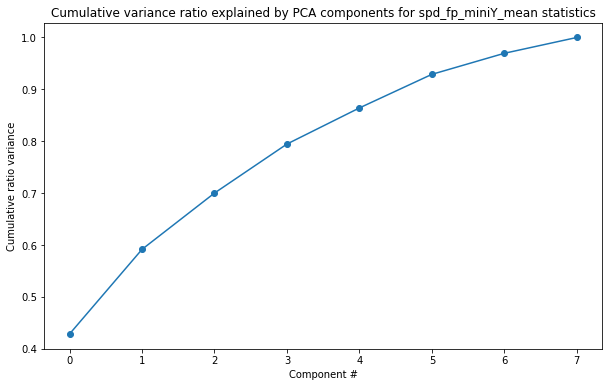

In [35]:
#Code task 6# in the 'Data Science prep course/The Apps Project/Tier 3: PART 3, Tier 3 - Modelling.ipynb'
#Call the `cumsum()` method on the 'explained_variance_ratio_' attribute of `state_pca` and
#create a line plot to visualize the cumulative explained variance ratio with number of components
#Set the xlabel to 'Component #', the ylabel to 'Cumulative ratio variance', and the
#title to 'Cumulative variance ratio explained by PCA components for state/resort summary statistics'
#Hint: remember the handy ';' at the end of the last plot call to suppress that untidy output
plt.subplots(figsize=(10, 6))
plt.plot(spd_fp_miniY_mean_pca.explained_variance_ratio_.cumsum(), marker='o') # refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html'
plt.xlabel('Component #') 
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for spd_fp_miniY_mean statistics');

In [36]:
# want to know exact percentage variance
spd_fp_miniY_mean_pca_pc_var_1 = 100 * spd_fp_miniY_mean_pca.explained_variance_ratio_.cumsum()[1]
spd_fp_miniY_mean_pca_pc_var_2 = 100 * spd_fp_miniY_mean_pca.explained_variance_ratio_.cumsum()[2]
spd_fp_miniY_mean_pca_pc_var_3 = 100 * spd_fp_miniY_mean_pca.explained_variance_ratio_.cumsum()[3]
spd_fp_miniY_mean_pca_pc_var_5 = 100 * spd_fp_miniY_mean_pca.explained_variance_ratio_.cumsum()[5]
print('components# 0-1:', spd_fp_miniY_mean_pca_pc_var_1) 
print('components# 0-2:', spd_fp_miniY_mean_pca_pc_var_2)      
print('components# 0-3:', spd_fp_miniY_mean_pca_pc_var_3) 
print('components# 0-5:', spd_fp_miniY_mean_pca_pc_var_5) 

components# 0-1: 59.16429556009035
components# 0-2: 70.01278863503235
components# 0-3: 79.46291051021326
components# 0-5: 92.89406731603265


In [37]:
spd_fp_miniN_mean = spd_fp_miniN.fillna(spd_fp_miniN.mean())
spd_fp_miniN_mean

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
1,0,5.0,7.00000,8.000000,4.000000,6.000000,3.000000,6.0,4.0
2,0,7.0,9.00000,10.000000,7.000000,8.000000,9.000000,8.0,7.0
3,0,4.0,10.00000,8.000000,5.000000,8.000000,7.000000,6.0,7.0
4,0,5.0,8.00000,8.000000,2.000000,2.000000,2.000000,7.0,5.0
6,0,4.0,8.00000,8.000000,5.000000,7.000000,4.000000,7.0,4.0
...,...,...,...,...,...,...,...,...,...
3133,0,2.0,6.87931,7.253665,5.714628,6.813915,4.815508,3.0,1.0
3134,0,7.0,10.00000,8.000000,8.000000,8.000000,7.000000,7.0,10.0
3135,0,6.0,8.00000,10.000000,6.000000,9.000000,5.000000,5.0,4.0
3136,0,3.0,9.00000,10.000000,3.000000,10.000000,2.000000,3.0,3.0


In [38]:
spd_fp_miniN_mean.isna().sum()

dec_o      0
attr_o     0
sinc_o     0
intel_o    0
fun_o      0
amb_o      0
shar_o     0
like_o     0
prob_o     0
dtype: int64

In [39]:
spd_fp_miniN_mean1 = spd_fp_miniN_mean.drop(columns=['dec_o'])
spd_fp_miniN_mean1

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
1,5.0,7.00000,8.000000,4.000000,6.000000,3.000000,6.0,4.0
2,7.0,9.00000,10.000000,7.000000,8.000000,9.000000,8.0,7.0
3,4.0,10.00000,8.000000,5.000000,8.000000,7.000000,6.0,7.0
4,5.0,8.00000,8.000000,2.000000,2.000000,2.000000,7.0,5.0
6,4.0,8.00000,8.000000,5.000000,7.000000,4.000000,7.0,4.0
...,...,...,...,...,...,...,...,...
3133,2.0,6.87931,7.253665,5.714628,6.813915,4.815508,3.0,1.0
3134,7.0,10.00000,8.000000,8.000000,8.000000,7.000000,7.0,10.0
3135,6.0,8.00000,10.000000,6.000000,9.000000,5.000000,5.0,4.0
3136,3.0,9.00000,10.000000,3.000000,10.000000,2.000000,3.0,3.0


In [40]:
spd_fp_miniN_mean_pca = PCA().fit(spd_fp_miniN_mean1)

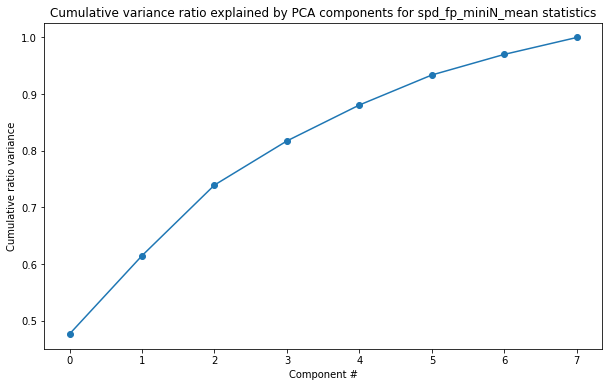

In [41]:
plt.subplots(figsize=(10, 6))
plt.plot(spd_fp_miniN_mean_pca.explained_variance_ratio_.cumsum(), marker='o') # refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html'
plt.xlabel('Component #') 
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for spd_fp_miniN_mean statistics');

In [42]:
# want to know exact percentage variance
spd_fp_miniN_mean_pca_pc_var_1 = 100 * spd_fp_miniN_mean_pca.explained_variance_ratio_.cumsum()[1]
spd_fp_miniN_mean_pca_pc_var_2 = 100 * spd_fp_miniN_mean_pca.explained_variance_ratio_.cumsum()[2]
spd_fp_miniN_mean_pca_pc_var_3 = 100 * spd_fp_miniN_mean_pca.explained_variance_ratio_.cumsum()[3]
spd_fp_miniN_mean_pca_pc_var_5 = 100 * spd_fp_miniN_mean_pca.explained_variance_ratio_.cumsum()[5]
print('components# 0-1:', spd_fp_miniN_mean_pca_pc_var_1) 
print('components# 0-2:', spd_fp_miniN_mean_pca_pc_var_2)      
print('components# 0-3:', spd_fp_miniN_mean_pca_pc_var_3) 
print('components# 0-5:', spd_fp_miniN_mean_pca_pc_var_5) 

components# 0-1: 61.469970470890246
components# 0-2: 73.94309027593634
components# 0-3: 81.73507947430441
components# 0-5: 93.37652241185754


In [43]:
spd_mp_miniY_mean = spd_mp_miniY.fillna(spd_mp_miniY.mean())
spd_mp_miniY_mean

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
2,1,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,1,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0
4,1,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0
5,1,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0
8,1,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0
...,...,...,...,...,...,...,...,...,...
3123,1,7.0,9.0,7.0,7.0,5.0,6.0,7.0,8.0
3124,1,8.0,7.0,7.0,7.0,5.0,5.0,7.0,6.0
3125,1,6.0,5.0,5.0,6.0,5.0,3.0,6.0,4.0
3126,1,8.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0


In [44]:
spd_mp_miniY_mean.isna().sum()

dec_o      0
attr_o     0
sinc_o     0
intel_o    0
fun_o      0
amb_o      0
shar_o     0
like_o     0
prob_o     0
dtype: int64

In [45]:
spd_mp_miniY_mean1 = spd_mp_miniY_mean.drop(columns=['dec_o'])
spd_mp_miniY_mean1

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
2,10.0,10.0,10.0,10.0,10.0,10.0,10.0,10.0
3,7.0,8.0,9.0,8.0,9.0,8.0,7.0,7.0
4,8.0,7.0,9.0,6.0,9.0,7.0,8.0,6.0
5,7.0,7.0,8.0,8.0,7.0,7.0,7.0,6.0
8,7.0,7.0,8.0,8.0,8.0,9.0,6.5,8.0
...,...,...,...,...,...,...,...,...
3123,7.0,9.0,7.0,7.0,5.0,6.0,7.0,8.0
3124,8.0,7.0,7.0,7.0,5.0,5.0,7.0,6.0
3125,6.0,5.0,5.0,6.0,5.0,3.0,6.0,4.0
3126,8.0,7.0,7.0,6.0,6.0,6.0,7.0,6.0


In [46]:
spd_mp_miniY_mean_pca = PCA().fit(spd_mp_miniY_mean1)

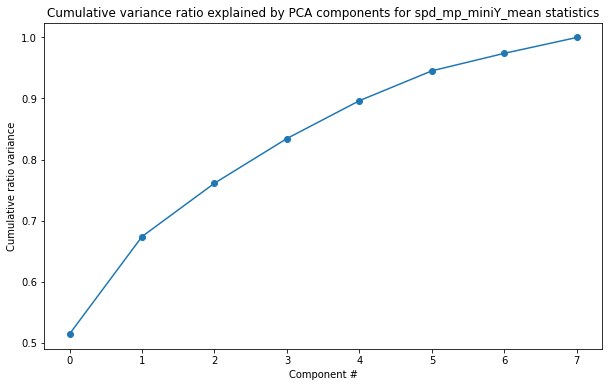

In [47]:
plt.subplots(figsize=(10, 6))
plt.plot(spd_mp_miniY_mean_pca.explained_variance_ratio_.cumsum(), marker='o') # refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html'
plt.xlabel('Component #') 
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for spd_mp_miniY_mean statistics');

In [48]:
# want to know exact percentage variance
spd_mp_miniY_mean_pca_pc_var_1 = 100 * spd_mp_miniY_mean_pca.explained_variance_ratio_.cumsum()[1]
spd_mp_miniY_mean_pca_pc_var_2 = 100 * spd_mp_miniY_mean_pca.explained_variance_ratio_.cumsum()[2]
spd_mp_miniY_mean_pca_pc_var_3 = 100 * spd_mp_miniY_mean_pca.explained_variance_ratio_.cumsum()[3]
spd_mp_miniY_mean_pca_pc_var_5 = 100 * spd_mp_miniY_mean_pca.explained_variance_ratio_.cumsum()[5]
print('components# 0-1:', spd_mp_miniY_mean_pca_pc_var_1) 
print('components# 0-2:', spd_mp_miniY_mean_pca_pc_var_2)      
print('components# 0-3:', spd_mp_miniY_mean_pca_pc_var_3) 
print('components# 0-5:', spd_mp_miniY_mean_pca_pc_var_5) 

components# 0-1: 67.37749315023748
components# 0-2: 76.11712386675002
components# 0-3: 83.44294981160428
components# 0-5: 94.53316279340939


In [49]:
spd_mp_miniN_mean = spd_mp_miniN.fillna(spd_mp_miniN.mean())
spd_mp_miniN_mean

,dec_o,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0
1,0,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0
6,0,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0
7,0,6.0,7.0,5.0,6.0,8.0,6.0,7.0,5.0
9,0,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...,...
3114,0,8.0,5.0,8.0,5.0,7.0,5.0,7.0,3.0
3115,0,9.0,7.0,9.0,6.0,7.0,5.0,8.0,4.0
3117,0,8.0,6.0,8.0,3.0,3.0,2.0,5.0,4.0
3118,0,6.0,6.0,7.0,9.0,7.0,4.0,7.0,5.0


In [50]:
spd_mp_miniN_mean.isna().sum()

dec_o      0
attr_o     0
sinc_o     0
intel_o    0
fun_o      0
amb_o      0
shar_o     0
like_o     0
prob_o     0
dtype: int64

In [51]:
spd_mp_miniN_mean1 = spd_mp_miniN_mean.drop(columns=['dec_o'])
spd_mp_miniN_mean1

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
0,6.0,8.0,8.0,8.0,8.0,6.0,7.0,4.0
1,7.0,8.0,10.0,7.0,7.0,5.0,8.0,4.0
6,3.0,6.0,7.0,5.0,8.0,7.0,2.0,1.0
7,6.0,7.0,5.0,6.0,8.0,6.0,7.0,5.0
9,6.0,6.0,6.0,6.0,6.0,6.0,6.0,6.0
...,...,...,...,...,...,...,...,...
3114,8.0,5.0,8.0,5.0,7.0,5.0,7.0,3.0
3115,9.0,7.0,9.0,6.0,7.0,5.0,8.0,4.0
3117,8.0,6.0,8.0,3.0,3.0,2.0,5.0,4.0
3118,6.0,6.0,7.0,9.0,7.0,4.0,7.0,5.0


In [52]:
spd_mp_miniN_mean_pca = PCA().fit(spd_mp_miniN_mean1)

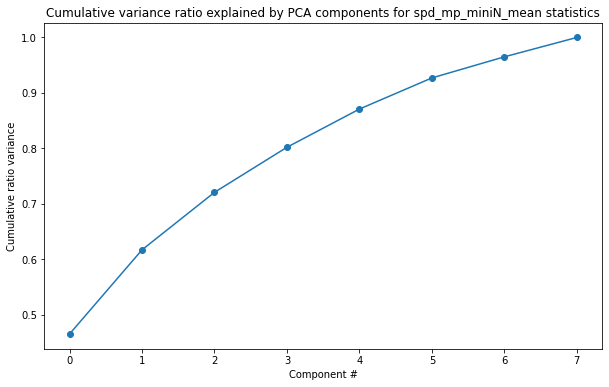

In [53]:
plt.subplots(figsize=(10, 6))
plt.plot(spd_mp_miniN_mean_pca.explained_variance_ratio_.cumsum(), marker='o') # refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.cumsum.html'
plt.xlabel('Component #') 
plt.ylabel('Cumulative ratio variance')
plt.title('Cumulative variance ratio explained by PCA components for spd_mp_miniN_mean statistics');

In [54]:
# want to know exact percentage variance
spd_mp_miniN_mean_pca_pc_var_1 = 100 * spd_mp_miniN_mean_pca.explained_variance_ratio_.cumsum()[1]
spd_mp_miniN_mean_pca_pc_var_2 = 100 * spd_mp_miniN_mean_pca.explained_variance_ratio_.cumsum()[2]
spd_mp_miniN_mean_pca_pc_var_3 = 100 * spd_mp_miniN_mean_pca.explained_variance_ratio_.cumsum()[3]
spd_mp_miniN_mean_pca_pc_var_5 = 100 * spd_mp_miniN_mean_pca.explained_variance_ratio_.cumsum()[5]
print('components# 0-1:', spd_mp_miniN_mean_pca_pc_var_1) 
print('components# 0-2:', spd_mp_miniN_mean_pca_pc_var_2)      
print('components# 0-3:', spd_mp_miniN_mean_pca_pc_var_3) 
print('components# 0-5:', spd_mp_miniN_mean_pca_pc_var_5) 

components# 0-1: 61.69203533385215
components# 0-2: 72.06691642980685
components# 0-3: 80.19542578757175
components# 0-5: 92.7012482988397


**How many components to keep?**

spd_fp_miniY_mean_pca_pc_var: 
- components# 0-1: 59.16429556009035
- components# 0-2: 70.01278863503235
- components# 0-3: 79.46291051021326
- components# 0-5: 92.89406731603265

spd_fp_miniN_mean_pca_pc_var:
- components# 0-1: 61.469970470890246
- components# 0-2: 73.94309027593634
- components# 0-3: 81.73507947430441
- components# 0-5: 93.37652241185754

spd_mp_miniY_mean_pca_pc_var:
- components# 0-1: 67.37749315023748
- components# 0-2: 76.11712386675002
- components# 0-3: 83.44294981160428
- components# 0-5: 94.53316279340939

spd_mp_miniN_mean_pca_pc_var:
- components# 0-1: 61.69203533385215
- components# 0-2: 72.06691642980685
- components# 0-3: 80.19542578757175
- components# 0-5: 92.7012482988397

Overall
- components# 0-1: ~60%
- components# 0-2: ~70%
- components# 0-3: ~80%
- components# 0-5: ~90%

**Things to confirm**

Components# in PCA plots
- 0: attr_o
- 1: sinc_o
- 2: intel_o
- 3: fun_o
- 4: amb_o
- 5: shar_o
- 6: like_o
- 7: prob_o					

### 2.4.3 Summarize the data visually and analytically (by the four groups, spd_fp_miniY_mean etc)

In [55]:
spd_fp_miniY_mean.attr_o.describe()

count    1131.000000
mean        7.144376
std         1.606394
min         1.000000
25%         6.000000
50%         7.000000
75%         8.000000
max        10.500000
Name: attr_o, dtype: float64

In [56]:
spd_fp_miniY_mean_stats = spd_fp_miniY_mean.groupby('dec_o')['attr_o'].describe()
spd_fp_miniY_mean_stats

,count,mean,std,min,25%,50%,75%,max
dec_o,,,,,,,,
1,1131.0,7.144376,1.606394,1.0,6.0,7.0,8.0,10.5


In [57]:
# refer to 'https://stackoverflow.com/questions/18022845/pandas-index-column-title-or-name'
# df.index.name = 'foo'
spd_fp_miniY_mean_stats.index.name = 'attr_o'
spd_fp_miniY_mean_stats
# not good, wanted to keep dec_o column

,count,mean,std,min,25%,50%,75%,max
attr_o,,,,,,,,
1,1131.0,7.144376,1.606394,1.0,6.0,7.0,8.0,10.5


In [58]:
spd_fp_miniY_mean_stats = pd.DataFrame()
spd_fp_miniY_mean_stats['attr_o'] = spd_fp_miniY_mean['attr_o'].describe()
spd_fp_miniY_mean_stats

,attr_o
count,1131.000000
mean,7.144376
std,1.606394
min,1.000000
25%,6.000000
50%,7.000000
75%,8.000000
max,10.500000


In [59]:
spd_fp_miniY_mean_stats['sinc_o'] = spd_fp_miniY_mean['sinc_o'].describe()
spd_fp_miniY_mean_stats

,attr_o,sinc_o
count,1131.000000,1131.000000
mean,7.144376,7.772889
std,1.606394,1.482113
min,1.000000,0.000000
25%,6.000000,7.000000
50%,7.000000,8.000000
75%,8.000000,9.000000
max,10.500000,10.000000


In [60]:
spd_fp_miniY_mean_stats = pd.DataFrame()
for i in spd_fp_miniY_mean1.columns:
    spd_fp_miniY_mean_stats[i] = spd_fp_miniY_mean[i].describe()
spd_fp_miniY_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,7.144376,7.772889,8.015138,7.408969,7.478866,6.682186,7.270593,6.084821
std,1.606394,1.482113,1.244010,1.534128,1.492618,1.692306,1.334890,1.906426
min,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,7.000000,7.000000,6.000000,7.000000,6.000000,6.000000,5.000000
50%,7.000000,8.000000,8.000000,7.000000,7.478866,7.000000,7.000000,6.000000
75%,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [61]:
spd_fp_miniY_mean1.columns

Index(['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o'],
      dtype='object')

In [62]:
spd_fp_miniY_mean.columns[1:]

Index(['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o'],
      dtype='object')

In [63]:
spd_fp_miniY_mean_stats = pd.DataFrame()
for i in spd_fp_miniY_mean.columns[1:]:
    spd_fp_miniY_mean_stats[i] = spd_fp_miniY_mean[i].describe()
spd_fp_miniY_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,7.144376,7.772889,8.015138,7.408969,7.478866,6.682186,7.270593,6.084821
std,1.606394,1.482113,1.244010,1.534128,1.492618,1.692306,1.334890,1.906426
min,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,7.000000,7.000000,6.000000,7.000000,6.000000,6.000000,5.000000
50%,7.000000,8.000000,8.000000,7.000000,7.478866,7.000000,7.000000,6.000000
75%,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [64]:
# define a function to make this stats df
def df_stats(df): # df should include the dec_o
    df_stats = pd.DataFrame()
    for i in df.columns[1:]:
        df_stats[i] = df[i].describe()
    return df_stats

In [65]:
spd_fp_miniY_mean_stats = df_stats(spd_fp_miniY_mean)
spd_fp_miniY_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000,1131.000000
mean,7.144376,7.772889,8.015138,7.408969,7.478866,6.682186,7.270593,6.084821
std,1.606394,1.482113,1.244010,1.534128,1.492618,1.692306,1.334890,1.906426
min,1.000000,0.000000,4.000000,1.000000,0.000000,0.000000,1.000000,0.000000
25%,6.000000,7.000000,7.000000,6.000000,7.000000,6.000000,6.000000,5.000000
50%,7.000000,8.000000,8.000000,7.000000,7.478866,7.000000,7.000000,6.000000
75%,8.000000,9.000000,9.000000,8.000000,8.000000,8.000000,8.000000,7.000000
max,10.500000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [66]:
spd_fp_miniN_mean_stats = df_stats(spd_fp_miniN_mean)
spd_fp_miniN_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000,2007.000000
mean,5.295713,6.879310,7.253665,5.714628,6.813915,4.815508,5.349451,4.746194
std,1.832594,1.862566,1.641976,1.979600,1.788449,1.941565,1.823143,2.080213
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,6.000000,6.000000,5.000000,6.000000,4.000000,4.000000,3.000000
50%,5.295713,7.000000,7.000000,6.000000,7.000000,4.815508,5.349451,5.000000
75%,7.000000,8.000000,8.000000,7.000000,8.000000,6.000000,7.000000,6.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [67]:
spd_mp_miniY_mean_stats = df_stats(spd_mp_miniY_mean)
spd_mp_miniY_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000,1549.000000
mean,7.446468,7.565858,7.594506,7.255976,6.975678,6.396118,7.250970,5.938602
std,1.422716,1.452995,1.303096,1.479745,1.496367,1.745840,1.284504,1.871559
min,2.000000,0.000000,3.000000,0.000000,2.000000,0.000000,3.000000,0.000000
25%,6.000000,7.000000,7.000000,6.000000,6.000000,5.000000,6.000000,5.000000
50%,7.000000,8.000000,8.000000,7.000000,7.000000,6.396118,7.000000,6.000000
75%,8.000000,8.000000,8.000000,8.000000,8.000000,7.000000,8.000000,7.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000


In [68]:
spd_mp_miniN_mean_stats = df_stats(spd_mp_miniN_mean)
spd_mp_miniN_mean_stats

,attr_o,sinc_o,intel_o,fun_o,amb_o,shar_o,like_o,prob_o
count,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000,1579.000000
mean,5.518104,6.902602,6.938003,5.723632,6.210860,4.774869,5.268602,4.497330
std,1.678114,1.644937,1.491636,1.806916,1.683807,1.826303,1.585634,2.067843
min,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
25%,5.000000,6.000000,6.000000,5.000000,5.000000,4.000000,4.000000,3.000000
50%,6.000000,7.000000,7.000000,6.000000,6.000000,4.774869,5.000000,4.497330
75%,7.000000,8.000000,8.000000,7.000000,7.000000,6.000000,6.000000,6.000000
max,10.000000,10.000000,10.000000,11.000000,10.000000,10.000000,10.000000,10.000000


In [69]:
# should make some plots, boxplot? violin plot?? comparing four groups per attributes

In [70]:
# should save newly formed df to csv,  spd_fp_miniY,  spd_fp_miniY_mean,  spd_fp_miniY_mean1...etc

# 3 Modelling

## 3.1 Hypothesis formulation

- **Null hypothesis (H0)**: the mean of the two groups are the same
- **Alternative hypothesis (H1)**: the mean of the two groups are different.
- Assumption: the underlying population variances of the two groups are equal.
- Significance level: 0.05!?? 

In [71]:
# two sample t-test for my data!?

# permutation and Bootstrap applicable here?, 
# permutation not commonly used in the real world!?

## 3.2 Calculate p-value using the t-statistic

In [72]:
# Calcualte t-statistic and p-value using t.ttest_ind(a, b[, axis, equal_var, nan_policy])
# refer to 'Frequentist Inference Case Study - Part B (2)_mk.ipynb'
# compare attributes rating using the vaiables without the dec_o
# female yes vs. male yes
stats.ttest_ind(spd_fp_miniY_mean1, spd_mp_miniY_mean1)

Ttest_indResult(statistic=array([-5.13903895,  3.61228321,  8.4118602 ,  2.60267754,  8.60679886,
        4.24384713,  0.38416305,  1.98185454]), pvalue=array([2.96028489e-07, 3.09092568e-04, 6.47173106e-17, 9.30090492e-03,
       1.25936563e-17, 2.27190157e-05, 7.00888100e-01, 4.75976073e-02]))

In [73]:
spd_fp_miniY_mean1.columns

Index(['attr_o', 'sinc_o', 'intel_o', 'fun_o', 'amb_o', 'shar_o', 'like_o',
       'prob_o'],
      dtype='object')

In [74]:
stats.ttest_ind(spd_fp_miniY_mean1, spd_mp_miniY_mean1)[1]

array([2.96028489e-07, 3.09092568e-04, 6.47173106e-17, 9.30090492e-03,
       1.25936563e-17, 2.27190157e-05, 7.00888100e-01, 4.75976073e-02])

In [75]:
spd_miniY_fp_vs_mp = pd.DataFrame()
spd_miniY_fp_vs_mp['attribute']= spd_fp_miniY_mean1.columns
spd_miniY_fp_vs_mp['p-value'] = stats.ttest_ind(spd_fp_miniY_mean1, spd_mp_miniY_mean1)[1]
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.set_index.html'
# spd_miniY_fp_vs_mp.set_index('attribute', inplace=True)
spd_miniY_fp_vs_mp

,attribute,p-value
0,attr_o,2.960285e-07
1,sinc_o,3.090926e-04
2,intel_o,6.471731e-17
3,fun_o,9.300905e-03
4,amb_o,1.259366e-17
5,shar_o,2.271902e-05
6,like_o,7.008881e-01
7,prob_o,4.759761e-02


In [76]:
# refer to 'https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html'
# df.sort_values(by=['col1'])
spd_miniY_fp_vs_mp.sort_values(by='p-value')

,attribute,p-value
4,amb_o,1.259366e-17
2,intel_o,6.471731e-17
0,attr_o,2.960285e-07
5,shar_o,2.271902e-05
1,sinc_o,3.090926e-04
3,fun_o,9.300905e-03
7,prob_o,4.759761e-02
6,like_o,7.008881e-01


In [77]:
# Better if I can add the mean value of each attribute for fpY and mpY data into the same df above.
spd_fp_miniY_mean_stats.index

Index(['count', 'mean', 'std', 'min', '25%', '50%', '75%', 'max'], dtype='object')

In [78]:
spd_fp_miniY_mean_stats_mean = spd_fp_miniY_mean_stats.loc['mean',:]
spd_fp_miniY_mean_stats_mean

attr_o     7.144376
sinc_o     7.772889
intel_o    8.015138
fun_o      7.408969
amb_o      7.478866
shar_o     6.682186
like_o     7.270593
prob_o     6.084821
Name: mean, dtype: float64

In [79]:
type(spd_fp_miniY_mean_stats.loc['mean',:])

pandas.core.series.Series

In [80]:
list(spd_fp_miniY_mean_stats.loc['mean',:])

[7.1443755535872455,
 7.772888888888888,
 8.01513802315227,
 7.40896860986547,
 7.478866474543713,
 6.682186234817823,
 7.270593445527015,
 6.08482142857143]

In [81]:
spd_fp_miniY_mean_stats.T

,count,mean,std,min,25%,50%,75%,max
attr_o,1131.0,7.144376,1.606394,1.0,6.0,7.000000,8.0,10.5
sinc_o,1131.0,7.772889,1.482113,0.0,7.0,8.000000,9.0,10.0
intel_o,1131.0,8.015138,1.244010,4.0,7.0,8.000000,9.0,10.0
fun_o,1131.0,7.408969,1.534128,1.0,6.0,7.000000,8.0,10.0
amb_o,1131.0,7.478866,1.492618,0.0,7.0,7.478866,8.0,10.0
shar_o,1131.0,6.682186,1.692306,0.0,6.0,7.000000,8.0,10.0
like_o,1131.0,7.270593,1.334890,1.0,6.0,7.000000,8.0,10.0
prob_o,1131.0,6.084821,1.906426,0.0,5.0,6.000000,7.0,10.0


In [82]:
spd_fp_miniY_mean_stats.T['mean']

attr_o     7.144376
sinc_o     7.772889
intel_o    8.015138
fun_o      7.408969
amb_o      7.478866
shar_o     6.682186
like_o     7.270593
prob_o     6.084821
Name: mean, dtype: float64

In [83]:
list(spd_fp_miniY_mean_stats.T['mean'])

[7.1443755535872455,
 7.772888888888888,
 8.01513802315227,
 7.40896860986547,
 7.478866474543713,
 6.682186234817823,
 7.270593445527015,
 6.08482142857143]

In [84]:
spd_fp_miniY_mean_stats_mean

attr_o     7.144376
sinc_o     7.772889
intel_o    8.015138
fun_o      7.408969
amb_o      7.478866
shar_o     6.682186
like_o     7.270593
prob_o     6.084821
Name: mean, dtype: float64

In [85]:
df = pd.DataFrame()
df['female partner Yes rating: mean'] = spd_fp_miniY_mean_stats_mean
df

,female partner Yes rating: mean
attr_o,7.144376
sinc_o,7.772889
intel_o,8.015138
fun_o,7.408969
amb_o,7.478866
shar_o,6.682186
like_o,7.270593
prob_o,6.084821


In [86]:
#%%%%%% why can't I add this new column? 
# spd_miniY_fp_vs_mp['Female partner Yes rating: mean'] = spd_fp_miniY_mean_stats.loc['mean',:] # this code gives all NaN column
# Meed to convert pandas series into list!!
spd_miniY_fp_vs_mp['Female partner Yes rating: mean'] = list(spd_fp_miniY_mean_stats.loc['mean',:])
spd_miniY_fp_vs_mp

,attribute,p-value,Female partner Yes rating: mean
0,attr_o,2.960285e-07,7.144376
1,sinc_o,3.090926e-04,7.772889
2,intel_o,6.471731e-17,8.015138
3,fun_o,9.300905e-03,7.408969
4,amb_o,1.259366e-17,7.478866
5,shar_o,2.271902e-05,6.682186
6,like_o,7.008881e-01,7.270593
7,prob_o,4.759761e-02,6.084821


In [87]:
spd_miniY_fp_vs_mp['Male partner Yes rating: mean'] = list(spd_mp_miniY_mean_stats.loc['mean',:])
spd_miniY_fp_vs_mp

,attribute,p-value,Female partner Yes rating: mean,Male partner Yes rating: mean
0,attr_o,2.960285e-07,7.144376,7.446468
1,sinc_o,3.090926e-04,7.772889,7.565858
2,intel_o,6.471731e-17,8.015138,7.594506
3,fun_o,9.300905e-03,7.408969,7.255976
4,amb_o,1.259366e-17,7.478866,6.975678
5,shar_o,2.271902e-05,6.682186,6.396118
6,like_o,7.008881e-01,7.270593,7.250970
7,prob_o,4.759761e-02,6.084821,5.938602


In [88]:
spd_miniY_fp_vs_mp.sort_values(by='p-value')

,attribute,p-value,Female partner Yes rating: mean,Male partner Yes rating: mean
4,amb_o,1.259366e-17,7.478866,6.975678
2,intel_o,6.471731e-17,8.015138,7.594506
0,attr_o,2.960285e-07,7.144376,7.446468
5,shar_o,2.271902e-05,6.682186,6.396118
1,sinc_o,3.090926e-04,7.772889,7.565858
3,fun_o,9.300905e-03,7.408969,7.255976
7,prob_o,4.759761e-02,6.084821,5.938602
6,like_o,7.008881e-01,7.270593,7.250970


The top three different attriute in female and male partner rating are amb_o, intel_o and attr_o.
<br> Female partner seem to prefer male subject who are more ambtious and intellegent, while male partner seem to prefer female subject who are more attractive (most likely visual apperance since each date is only given 4min) and less ambitious.
<br> Having shared interests does not seem to be too important in selecting partner for both genders, yet female partner seem to prefer to have more shared interest than male partner.

In [89]:
# female No vs. male No
stats.ttest_ind(spd_fp_miniN_mean1, spd_mp_miniN_mean1)

Ttest_indResult(statistic=array([-3.74305832, -0.39117437,  5.94838795, -0.1404686 , 10.28445956,
        0.63863628,  1.39524421,  3.56575353]), pvalue=array([1.84645563e-04, 6.95691604e-01, 2.96777354e-09, 8.88297656e-01,
       1.80605221e-24, 5.23100380e-01, 1.63028658e-01, 3.67551746e-04]))

In [90]:
spd_miniN_fp_vs_mp = pd.DataFrame()
spd_miniN_fp_vs_mp['attribute']= spd_fp_miniY_mean1.columns
spd_miniN_fp_vs_mp['p-value'] = stats.ttest_ind(spd_fp_miniN_mean1, spd_mp_miniN_mean1)[1]
spd_miniY_fp_vs_mp

,attribute,p-value,Female partner Yes rating: mean,Male partner Yes rating: mean
0,attr_o,2.960285e-07,7.144376,7.446468
1,sinc_o,3.090926e-04,7.772889,7.565858
2,intel_o,6.471731e-17,8.015138,7.594506
3,fun_o,9.300905e-03,7.408969,7.255976
4,amb_o,1.259366e-17,7.478866,6.975678
5,shar_o,2.271902e-05,6.682186,6.396118
6,like_o,7.008881e-01,7.270593,7.250970
7,prob_o,4.759761e-02,6.084821,5.938602


In [91]:
spd_miniN_fp_vs_mp.sort_values(by='p-value')

,attribute,p-value
4,amb_o,1.806052e-24
2,intel_o,2.967774e-09
0,attr_o,1.846456e-04
7,prob_o,3.675517e-04
6,like_o,1.630287e-01
5,shar_o,5.231004e-01
1,sinc_o,6.956916e-01
3,fun_o,8.882977e-01


for both Yes and No data, the top 3 attributes with differece are the same: amb_o, intel_o, attr_o

In [92]:
# Better if I can add the mean value of each attribute for fpN and mpN data into the same df above.
spd_miniN_fp_vs_mp['Female partner No rating: mean'] = list(spd_fp_miniN_mean_stats.loc['mean',:])
spd_miniN_fp_vs_mp

,attribute,p-value,Female partner No rating: mean
0,attr_o,1.846456e-04,5.295713
1,sinc_o,6.956916e-01,6.879310
2,intel_o,2.967774e-09,7.253665
3,fun_o,8.882977e-01,5.714628
4,amb_o,1.806052e-24,6.813915
5,shar_o,5.231004e-01,4.815508
6,like_o,1.630287e-01,5.349451
7,prob_o,3.675517e-04,4.746194


In [93]:
spd_miniN_fp_vs_mp['Male partner No rating: mean'] = list(spd_mp_miniN_mean_stats.loc['mean',:])
spd_miniN_fp_vs_mp

,attribute,p-value,Female partner No rating: mean,Male partner No rating: mean
0,attr_o,1.846456e-04,5.295713,5.518104
1,sinc_o,6.956916e-01,6.879310,6.902602
2,intel_o,2.967774e-09,7.253665,6.938003
3,fun_o,8.882977e-01,5.714628,5.723632
4,amb_o,1.806052e-24,6.813915,6.210860
5,shar_o,5.231004e-01,4.815508,4.774869
6,like_o,1.630287e-01,5.349451,5.268602
7,prob_o,3.675517e-04,4.746194,4.497330


In [94]:
spd_miniN_fp_vs_mp.sort_values(by='p-value')

,attribute,p-value,Female partner No rating: mean,Male partner No rating: mean
4,amb_o,1.806052e-24,6.813915,6.210860
2,intel_o,2.967774e-09,7.253665,6.938003
0,attr_o,1.846456e-04,5.295713,5.518104
7,prob_o,3.675517e-04,4.746194,4.497330
6,like_o,1.630287e-01,5.349451,5.268602
5,shar_o,5.231004e-01,4.815508,4.774869
1,sinc_o,6.956916e-01,6.879310,6.902602
3,fun_o,8.882977e-01,5.714628,5.723632


In [95]:
# female Yes vs. female No
stats.ttest_ind(spd_fp_miniY_mean1, spd_fp_miniN_mean1)

Ttest_indResult(statistic=array([28.33967429, 13.85103964, 13.5566634 , 24.87974363, 10.59589917,
       27.05583178, 31.05528817, 17.82927821]), pvalue=array([1.68737281e-157, 2.16631648e-042, 9.94059345e-041, 7.47213914e-125,
       8.45480830e-026, 4.47002538e-145, 7.38829552e-185, 8.34934883e-068]))

In [96]:
spd_fp_mini_Y_vs_N = pd.DataFrame()
spd_fp_mini_Y_vs_N['attribute']= spd_fp_miniY_mean1.columns
spd_fp_mini_Y_vs_N['p-value'] = stats.ttest_ind(spd_fp_miniY_mean1, spd_fp_miniN_mean1)[1]
spd_fp_mini_Y_vs_N

,attribute,p-value
0,attr_o,1.687373e-157
1,sinc_o,2.166316e-42
2,intel_o,9.940593e-41
3,fun_o,7.472139e-125
4,amb_o,8.454808e-26
5,shar_o,4.470025e-145
6,like_o,7.388296e-185
7,prob_o,8.349349e-68


In [97]:
spd_fp_mini_Y_vs_N.sort_values(by='p-value')

,attribute,p-value
6,like_o,7.388296e-185
0,attr_o,1.687373e-157
5,shar_o,4.470025e-145
3,fun_o,7.472139e-125
7,prob_o,8.349349e-68
1,sinc_o,2.166316e-42
2,intel_o,9.940593e-41
4,amb_o,8.454808e-26


In [98]:
# Better if I can add the mean value of each attribute for fpY and fpN data into the same df above.
spd_fp_mini_Y_vs_N['Female partner Yes rating: mean'] = list(spd_fp_miniY_mean_stats.loc['mean',:])
spd_fp_mini_Y_vs_N

,attribute,p-value,Female partner Yes rating: mean
0,attr_o,1.687373e-157,7.144376
1,sinc_o,2.166316e-42,7.772889
2,intel_o,9.940593e-41,8.015138
3,fun_o,7.472139e-125,7.408969
4,amb_o,8.454808e-26,7.478866
5,shar_o,4.470025e-145,6.682186
6,like_o,7.388296e-185,7.270593
7,prob_o,8.349349e-68,6.084821


In [99]:
spd_fp_mini_Y_vs_N['Female partner No rating: mean'] = list(spd_fp_miniN_mean_stats.loc['mean',:])
spd_fp_mini_Y_vs_N

,attribute,p-value,Female partner Yes rating: mean,Female partner No rating: mean
0,attr_o,1.687373e-157,7.144376,5.295713
1,sinc_o,2.166316e-42,7.772889,6.879310
2,intel_o,9.940593e-41,8.015138,7.253665
3,fun_o,7.472139e-125,7.408969,5.714628
4,amb_o,8.454808e-26,7.478866,6.813915
5,shar_o,4.470025e-145,6.682186,4.815508
6,like_o,7.388296e-185,7.270593,5.349451
7,prob_o,8.349349e-68,6.084821,4.746194


In [100]:
spd_fp_mini_Y_vs_N.sort_values(by='p-value')

,attribute,p-value,Female partner Yes rating: mean,Female partner No rating: mean
6,like_o,7.388296e-185,7.270593,5.349451
0,attr_o,1.687373e-157,7.144376,5.295713
5,shar_o,4.470025e-145,6.682186,4.815508
3,fun_o,7.472139e-125,7.408969,5.714628
7,prob_o,8.349349e-68,6.084821,4.746194
1,sinc_o,2.166316e-42,7.772889,6.879310
2,intel_o,9.940593e-41,8.015138,7.253665
4,amb_o,8.454808e-26,7.478866,6.813915


Attributes with top four differences in female partner's Yes vs. No decision: like_o, attr_o, shar_o, fun_o

In [101]:
# Male Yes vs. Male No
stats.ttest_ind(spd_mp_miniY_mean1, spd_mp_miniN_mean1)

Ttest_indResult(statistic=array([34.63503637, 11.94356677, 13.09919463, 25.9216906 , 13.41907256,
       25.37056856, 38.37828823, 20.42601831]), pvalue=array([9.16440500e-223, 3.48054727e-032, 3.31426801e-038, 2.31754771e-134,
       5.84382214e-040, 2.77959596e-129, 2.19789246e-264, 3.76679934e-087]))

In [102]:
spd_mp_mini_Y_vs_N = pd.DataFrame()
spd_mp_mini_Y_vs_N['attribute']= spd_fp_miniY_mean1.columns
spd_mp_mini_Y_vs_N['p-value'] = stats.ttest_ind(spd_mp_miniY_mean1, spd_mp_miniN_mean1)[1]
spd_mp_mini_Y_vs_N

,attribute,p-value
0,attr_o,9.164405e-223
1,sinc_o,3.480547e-32
2,intel_o,3.314268e-38
3,fun_o,2.317548e-134
4,amb_o,5.843822e-40
5,shar_o,2.779596e-129
6,like_o,2.197892e-264
7,prob_o,3.766799e-87


In [103]:
spd_mp_mini_Y_vs_N.sort_values(by='p-value')

,attribute,p-value
6,like_o,2.197892e-264
0,attr_o,9.164405e-223
3,fun_o,2.317548e-134
5,shar_o,2.779596e-129
7,prob_o,3.766799e-87
4,amb_o,5.843822e-40
2,intel_o,3.314268e-38
1,sinc_o,3.480547e-32


In [104]:
# Better if I can add the mean value of each attribute for mpY and mpN data into the same df above.
spd_mp_mini_Y_vs_N['Male partner Yes rating: mean'] = list(spd_mp_miniY_mean_stats.loc['mean',:])
spd_mp_mini_Y_vs_N

,attribute,p-value,Male partner Yes rating: mean
0,attr_o,9.164405e-223,7.446468
1,sinc_o,3.480547e-32,7.565858
2,intel_o,3.314268e-38,7.594506
3,fun_o,2.317548e-134,7.255976
4,amb_o,5.843822e-40,6.975678
5,shar_o,2.779596e-129,6.396118
6,like_o,2.197892e-264,7.250970
7,prob_o,3.766799e-87,5.938602


In [105]:
spd_mp_mini_Y_vs_N['Male partner No rating: mean'] = list(spd_mp_miniN_mean_stats.loc['mean',:])
spd_mp_mini_Y_vs_N

,attribute,p-value,Male partner Yes rating: mean,Male partner No rating: mean
0,attr_o,9.164405e-223,7.446468,5.518104
1,sinc_o,3.480547e-32,7.565858,6.902602
2,intel_o,3.314268e-38,7.594506,6.938003
3,fun_o,2.317548e-134,7.255976,5.723632
4,amb_o,5.843822e-40,6.975678,6.210860
5,shar_o,2.779596e-129,6.396118,4.774869
6,like_o,2.197892e-264,7.250970,5.268602
7,prob_o,3.766799e-87,5.938602,4.497330


In [106]:
spd_mp_mini_Y_vs_N.sort_values(by='p-value')

,attribute,p-value,Male partner Yes rating: mean,Male partner No rating: mean
6,like_o,2.197892e-264,7.250970,5.268602
0,attr_o,9.164405e-223,7.446468,5.518104
3,fun_o,2.317548e-134,7.255976,5.723632
5,shar_o,2.779596e-129,6.396118,4.774869
7,prob_o,3.766799e-87,5.938602,4.497330
4,amb_o,5.843822e-40,6.975678,6.210860
2,intel_o,3.314268e-38,7.594506,6.938003
1,sinc_o,3.480547e-32,7.565858,6.902602


Attributes with top four differences in male partner's Yes vs. No decision: like_o, attr_o, fun_o, shar_o

### Variable Summary
- spd_fp_mini: built upon spd_fp
    - columns: columns = dec_o to prob_o
- spd_fp_miniY: built upon spd_fp_mini
    - dec_o = 1 (Yes)
- spd_fp_miniN: built upon spd_fp_mini  
    - dec_o = 0 (No)
- spd_mp_mini: built upon spd_mp
    - columns: columns = dec_o to prob_o
- spd_mp_miniY: built upon spd_mp_mini
    - dec_o = 1 (Yes)
- spd_mp_miniN: built upon spd_mp_mini  
    - dec_o = 0 (No)
- spd_fp_miniY_mean: built upon spd_fp_miniY
    - fill missing data (NaN) with mean
- spd_fp_miniY_mean1: built upon spd_fp_miniY_mean
    - drop dec_o (dependent variable for PCA)
    
- spd_fp_miniY_mean_stats: built upon spd_fp_miniY_mean
    - df of stats: describe() info

- spd_miniY_fp_vs_mp: built upon spd_fp_miniY_mean1 vs. spd_mp_miniY_mean1
    - df of stats: p-value (t-statistic), mean

### reference
- 6_GuidedCapstone/03_exploratory_data_analysis_mk
- pandas_profiling: https://pypi.org/project/pandas-profiling/2.9.0/
    - pandas-profiling version 2.10 didn't run on this notebook (kernel kept dying)
- Data Science prep course/The Apps Project/Tier 3: PART 3, Tier 3 - Modelling.ipynb
- Springboad Regression Case Study - the Red Wine Dataset - Tier 3_mk.ipynb
- 11.1.3_Case Study - Frequentist Inference - A and B/Frequentist Inference Case Study - Part B (2)_mk.ipynb
    - student t-test: t_testind from scipy.stat
- Data Camp coding examples_section 11?
    - 11.3.1_2_Phython Statistics2_Bootstrap confidence intervals
    - 11.3.1_4_Phython Statistics2_Hypothesis test examples